In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
salary=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/salaries.csv')
salary

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
input1 = salary.drop('salary_more_then_100k',axis='columns')
target= salary['salary_more_then_100k']

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn import tree
dt=tree.DecisionTreeClassifier

In [5]:
input1['company']=le.fit_transform(input1['company'])
input1['job'] = le.fit_transform(input1['job'])
input1['degree']=le.fit_transform(input1['degree'])
input1

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [6]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()

In [7]:
dt.fit(input1,target)

DecisionTreeClassifier()

In [8]:
dt.score(input1,target)

1.0

In [9]:
dt.predict([[1,1,1]])

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [10]:
#### =============== EXERCISE ================

In [11]:
titanic=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
input_1=titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
input_1


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [13]:
ip=input_1.drop('Survived',axis='columns')
ip.Sex=ip.Sex.map({'male':1,'female':2})
op=input_1['Survived']

In [14]:
ip.Age=ip.Sex.fillna(ip.Age.mean())

In [15]:
ip

,Pclass,Sex,Age,Fare
0,3,1,1,7.2500
1,1,2,2,71.2833
2,3,2,2,7.9250
3,1,2,2,53.1000
4,3,1,1,8.0500
...,...,...,...,...
886,2,1,1,13.0000
887,1,2,2,30.0000
888,3,2,2,23.4500
889,1,1,1,30.0000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
mod=DecisionTreeClassifier()

In [17]:
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2)

In [18]:
len(x_train)

712

In [19]:
mod.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred=mod.predict(x_test)

[[99 15]
 [19 46]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       114
           1       0.75      0.71      0.73        65

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



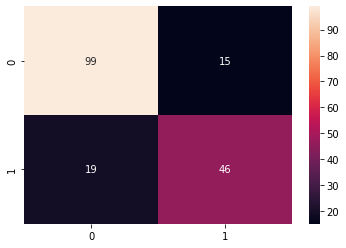

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(sns.heatmap(cm, annot=True))
print(classification_report(y_test,y_pred)) 